# Chebyshev interpolation

## The Chebfun toolbox

[Chebfun](http://www.chebfun.org) is an [open-source](https://github.com/chebfun/chebfun) MATLAB package for numerical computing with functions. It allows to represent continuous functions by polynomial interpolation in Chebyshev points.

Chebfun is well documented. The user guide has a [web/HTML](http://www.chebfun.org/docs/guide/) and a [PDF](http://www.chebfun.org/docs/guide/chebfun_guide.pdf) version.

Specific examples that explain more of the workings of Chebfun:

* [Speed and Accuracy of Chebfun `roots`](http://www.chebfun.org/examples/roots/RootsSpeed.html)
* [Does a chebfun of degree `n` have `n` roots?](http://www.chebfun.org/examples/roots/FundamentalTheoremOfAlgebra.html)
* [1D subdivision and the average degree reduction](http://www.chebfun.org/examples/roots/AverageDegreeReduction1D.html)

Interesting publications related to Chebfun:

* [An Extension of MATLAB to Continuous Functions and Operators](https://doi.org/10.1137/S1064827503430126)
* [Barycentric-Remez algorithms for best polynomial approximation in the chebfun system](https://doi.org/10.1007/s10543-009-0240-1)
* [Extension of Chebfun to Periodic Functions](https://doi.org/10.1137/141001007)
* [Chopping a Chebyshev Series](https://doi.org/10.1145/2998442)

## Non-MATLAB implementations

There are other [chebfun-related projects](http://www.chebfun.org/about/projects.html) that do not use MATLAB.

### ChebTools

The C++ implementation [ChebTools](https://github.com/usnistgov/ChebTools) is promising. It even has Python bindings for easy use. However, it lacks automatic construction and instead always requires a fixed number of points to be specified.

Documentation can be found here:

* [publication](https://joss.theoj.org/papers/10.21105/joss.00569)
* [examples](https://github.com/usnistgov/ChebTools/blob/master/main.cpp)
* [header](https://github.com/usnistgov/ChebTools/blob/master/include/ChebTools/ChebTools.h)
* [src](https://github.com/usnistgov/ChebTools/blob/master/src/ChebTools.cpp)

Install: `pip install git+https://github.com/usnistgov/ChebTools.git`

### pychebfun

The [pychebfun](https://github.com/olivierverdier/pychebfun) project is a lightweight Python implementation of Chebfun. It has a constructor that checks for convergence and provides most required methods, but lacks a lot of functionality. Unfortunately, the repository has been stale since 2016.

Install: `pip install git+https://github.com/pychebfun/pychebfun.git`

### chebpy

The project [chebpy](https://github.com/chebpy/chebpy) attempts to replicate Chebfun in Python. The [implementation notes](https://github.com/chebpy/chebpy/blob/master/implementation-notes.rst) show the progress.

Install: `pip install git+https://github.com/chebpy/chebpy.git`

### NumPy

NumPy has support for chebyshev polynomials in the [numpy.polynomial.chebyshev](https://github.com/numpy/numpy/blob/master/numpy/polynomial/chebyshev.py) module. However, this does not come with the ease of use that other packages have, specifically automatic constructors.

### Comparison of the different packages

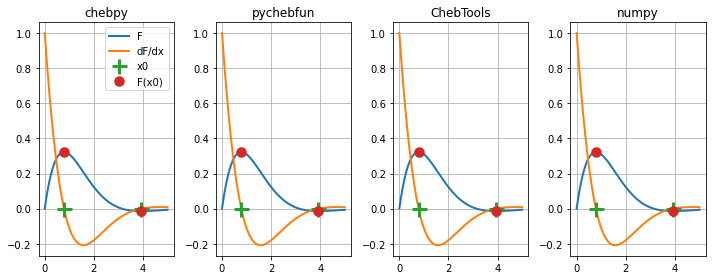

In [1]:
import numpy as np
import matplotlib.pyplot as plt

names = ['chebpy', 'pychebfun', 'ChebTools', 'numpy']
modules = []
import importlib
for name in names:
    try:
        module = importlib.import_module(name)
    except:
        module = None
    modules.append(module)

# define the function
fn = lambda x: np.sin(x)*np.exp(-x)
lims = (0, 5)

fig, axes = plt.subplots(1, len(modules))
fig.set_figwidth(10)

for i, (ax, name, module) in enumerate(zip(axes, names, modules)):

    ax.set_title(name)  # do this anyway
    if module is None:
        ax.tick_params(axis='both', which='both',           # on x & y axis
                       left=False, bottom=False,            # turn off ticks
                       labelleft=False, labelbottom=False,  # and ticklabels
                      )
        continue

    # CASES
    if name == 'chebpy':
        cheb = module.chebfun(fn, lims)
        dcheb = cheb.diff()
        extrema = dcheb.roots()
        fn_y = cheb
        fn_dy = dcheb
    elif name == 'pychebfun':
        cheb = module.Chebfun.from_function(fn, lims)
        dcheb = cheb.differentiate()
        extrema = dcheb.roots()
        fn_y = cheb
        fn_dy = dcheb
    elif name == 'ChebTools':
        cheb = module.generate_Chebyshev_expansion(200, fn, *lims)
        dcheb = cheb.deriv(1)
        extrema = dcheb.real_roots(True)  # __.real_roots(only_in_domain)
        fn_y = cheb.y
        fn_dy = dcheb.y
    elif name == 'numpy':
        npcheb = module.polynomial.chebyshev
        cheb = npcheb.Chebyshev.interpolate(fn, 200, domain=lims)
        dcheb = cheb.deriv()
        extrema = dcheb.roots()
        fn_y = cheb
        fn_dy = dcheb
        # roots need extra processing, only use real ones that are in range
        extrema = extrema[np.isreal(extrema)].real  # also only take real part
        extrema = extrema[np.logical_and(extrema>=lims[0], extrema<=lims[1])]

    # DATA
    extrema = np.array(extrema)
    x_plt = np.linspace(*lims, 2001)
    y_plt = fn_y(x_plt)
    dy_plt = fn_dy(x_plt)

    # LINES
    ax.plot(x_plt, y_plt, ls='-', lw=2, label='F')
    ax.plot(x_plt, dy_plt, ls='-', lw=2, label='dF/dx')
    # POINTS
    ax.plot(extrema, 0*extrema, '+', ms=15, mew=3, label='x0')
    ax.plot(extrema, fn(extrema), '.', ms=15, mew=3, label='F(x0)')
    ax.grid()  # makes it easier to see y=0
    if i == 0:  # only first one
        ax.legend()

# done
fig.tight_layout()  # pretty
plt.show()